In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/bank_customer_churn.csv')


Mounted at /content/drive


In [2]:
# importing libraries

import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# Part 1 Data Acquisition

# Display the first ten rows of the data frame to examine if it is an individual-level data set
print(df.head(10))

# Display the variable list
print(df.columns.values)

print(df.shape)

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0       

In [4]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname', 'Complain'],inplace=True)

In [6]:
# Separate all the variables into two lists for future column indexing
# One for numerical, the other for categorical
cvar_list = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Satisfaction Score', 'Card Type']
nvar_list = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']

# Check if there is any missing value left
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [7]:
# Variable Transformation
df_sample1 = df.copy()

# Set the datatype for the variables in the cvar_list to be categorical in Python
# Set the datatype for the variables in the nvar_list to be numerical in Python
df_sample2 = df_sample1.copy()
df_sample2[cvar_list] = df_sample1[cvar_list].astype('category')
df_sample2[nvar_list] = df_sample1[nvar_list].astype('float64')

# Convert the categorical variables into dummies (Step 1 of dummy coding)
# prefix_sep is the sympol used to create the dummy variable names.

df_sample3 = df_sample2.copy()
df_sample3 = pd.get_dummies(df_sample2, prefix_sep='_')

df_sample3
print(df_sample3.columns.values)

['CreditScore' 'Age' 'Tenure' 'Balance' 'EstimatedSalary' 'Point Earned'
 'Geography_France' 'Geography_Germany' 'Geography_Spain' 'Gender_Female'
 'Gender_Male' 'NumOfProducts_1' 'NumOfProducts_2' 'NumOfProducts_3'
 'NumOfProducts_4' 'HasCrCard_0' 'HasCrCard_1' 'IsActiveMember_0'
 'IsActiveMember_1' 'Exited_0' 'Exited_1' 'Satisfaction Score_1'
 'Satisfaction Score_2' 'Satisfaction Score_3' 'Satisfaction Score_4'
 'Satisfaction Score_5' 'Card Type_DIAMOND' 'Card Type_GOLD'
 'Card Type_PLATINUM' 'Card Type_SILVER']


In [8]:
# Identify the mode of each categorical variable and the corresponding dummy column to drop
rdummies = []
for var in cvar_list:
    mode_value = df_sample2[var].mode()[0]  # Get the mode for the variable
    dummy_to_drop = f"{var}_{mode_value}"  # Construct the dummy column name for the mode
    rdummies.append(dummy_to_drop)

# Remove the redundant dummies (Step 2 of dummy coding)
df_sample4 = df_sample3.copy()
df_sample4 = df_sample3.drop(columns=rdummies)

# Get the remaining variable list after the variable transformation
print("Remaining variables:", df_sample4.columns.values)

# Display the milestone dataframe. Compare it with the original dataframe.
print(df_sample4)
print(df)

Remaining variables: ['CreditScore' 'Age' 'Tenure' 'Balance' 'EstimatedSalary' 'Point Earned'
 'Geography_Germany' 'Geography_Spain' 'Gender_Female' 'NumOfProducts_2'
 'NumOfProducts_3' 'NumOfProducts_4' 'HasCrCard_0' 'IsActiveMember_0'
 'Exited_1' 'Satisfaction Score_1' 'Satisfaction Score_2'
 'Satisfaction Score_4' 'Satisfaction Score_5' 'Card Type_GOLD'
 'Card Type_PLATINUM' 'Card Type_SILVER']
      CreditScore   Age  Tenure    Balance  EstimatedSalary  Point Earned  \
0           619.0  42.0     2.0       0.00        101348.88         464.0   
1           608.0  41.0     1.0   83807.86        112542.58         456.0   
2           502.0  42.0     8.0  159660.80        113931.57         377.0   
3           699.0  39.0     1.0       0.00         93826.63         350.0   
4           850.0  43.0     2.0  125510.82         79084.10         425.0   
...           ...   ...     ...        ...              ...           ...   
9995        771.0  39.0     5.0       0.00         96270.64 

# Classification Tree

In [9]:
from sklearn.model_selection import train_test_split
# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition
df4partition = df_sample4.copy()
testpart_size = 0.2

# random_state specifies the seed for random number generator.
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

      CreditScore   Age  Tenure    Balance  EstimatedSalary  Point Earned  \
2694        628.0  29.0     3.0  113146.98        124749.08         354.0   
5140        626.0  29.0     4.0  105767.28         41104.82         838.0   
2568        612.0  47.0     6.0  130024.87         45750.21         705.0   
3671        646.0  52.0     6.0  111739.40         68367.18         234.0   
7427        714.0  33.0     8.0  122017.19        162515.17         504.0   
...           ...   ...     ...        ...              ...           ...   
2895        621.0  47.0     7.0  107363.29         66799.28         801.0   
7813        684.0  63.0     3.0   81245.79         69643.31         870.0   
905         672.0  45.0     9.0       0.00         92027.69         397.0   
5192        663.0  39.0     8.0       0.00        101168.90         445.0   
235         763.0  42.0     6.0  100160.75         33462.94         709.0   

      Geography_Germany  Geography_Spain  Gender_Female  NumOfProducts_2  .

In [10]:
# Classification tree

# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: tree
# Required function name: DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier


# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
#Dropping
DV = 'Exited_1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile

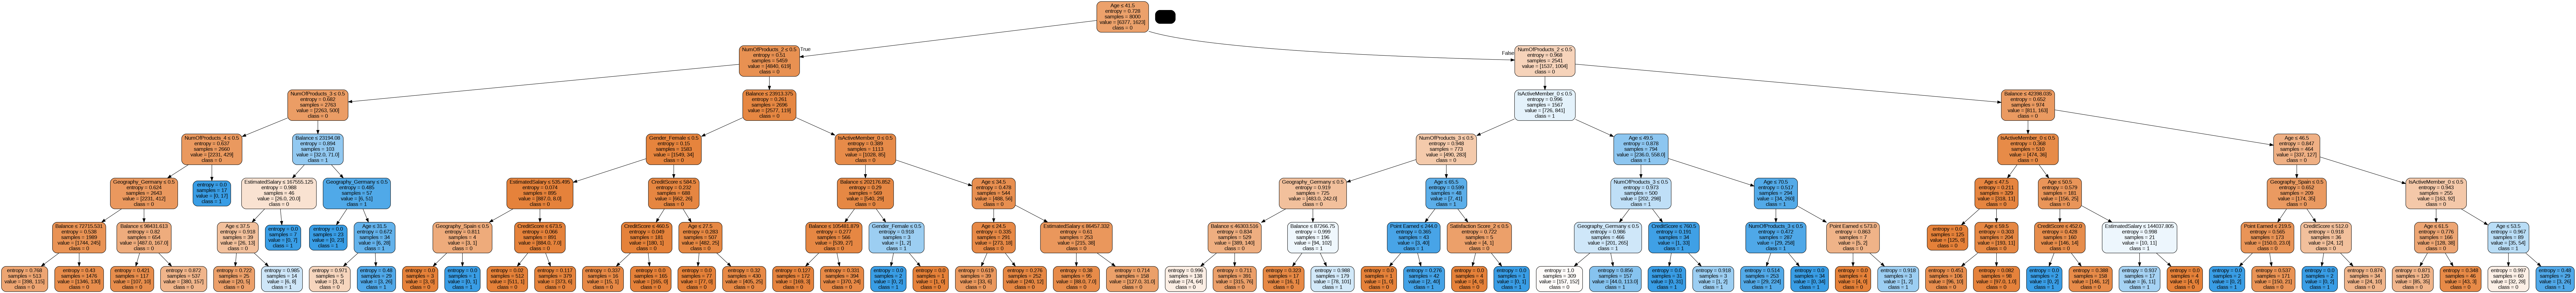

In [11]:
# Run Classification tree with k-fold cross validation with k=5
# Placeholder variable: kfolds
kfolds = 5

# Here we specify within which range of depths we will search for the best pruned tree
maximum_depth = 8
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}


# Set n_jobs to be -1 to run  on all CPU cores.
# The search criterion is to find the model that maximizes
# whatever the scoring function - for this case roc_auc - returns.

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

# Display the resulting best pruned tree
Image(summary_tree(clf_BPT))


In [12]:
# Display the level of depth of the best pruned tree
print('Depth of Best Pruned Tree: ')
print(clf_BPT.get_depth())

# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])


# Get the AUC of the best pruned tree model
from sklearn.metrics import roc_auc_score
print('AUC: ')
print(roc_auc_score(y_test_actual, clf_BPT.predict_proba(X_test)[:,1]))

Depth of Best Pruned Tree: 
6
AUC: 
0.8507065485918437


In [13]:
import numpy as np

# The user-defined function for getting the tree path

def get_treepaths(dtc, df):
    rules_list = []
    values_path = []
    values = dtc.tree_.value

    def RevTraverseTree(tree, node, rules, pathValues):
        try:
            prevnode = tree[2].index(node)
            leftright = '<='
            pathValues.append(values[prevnode])
        except ValueError:
            # failed, so find it as a right node - if this also causes an exception, something's really f'd up
            prevnode = tree[3].index(node)
            leftright = '>'
            pathValues.append(values[prevnode])

        # now let's get the rule that caused prevnode to -> node
        p1 = df.columns[tree[0][prevnode]]
        p2 = tree[1][prevnode]
        rules.append(str(p1) + ' ' + leftright + ' ' + str(p2))

        # if we've not yet reached the top, go up the tree one more step
        if prevnode != 0:
            RevTraverseTree(tree, prevnode, rules, pathValues)

    # get the nodes which are leaves
    leaves = dtc.tree_.children_left == -1
    leaves = np.arange(0,dtc.tree_.node_count)[leaves]

    # build a simpler tree as a nested list: [split feature, split threshold, left node, right node]
    thistree = [dtc.tree_.feature.tolist()]
    thistree.append(dtc.tree_.threshold.tolist())
    thistree.append(dtc.tree_.children_left.tolist())
    thistree.append(dtc.tree_.children_right.tolist())

    # get the decision rules for each leaf node & apply them
    for (ind,nod) in enumerate(leaves):

        # get the decision rules
        rules = []
        pathValues = []
        RevTraverseTree(thistree, nod, rules, pathValues)

        pathValues.insert(0, values[nod])
        pathValues = list(reversed(pathValues))

        rules = list(reversed(rules))

        rules_list.append(rules)
        values_path.append(pathValues)


    for i in range(len(rules_list)):

      print('\nLeaf node ID =', i+1)
      print('Path =', rules_list[i])
      samples = dtc.tree_.n_node_samples[leaves[i]]
      class_counts = np.round(values_path[i][-1][0] * samples).astype(int)
      print('sample =', int(np.sum(class_counts)))  # Total number of samples at the leaf
      print('value =', list(class_counts))  # Class counts (not probabilities)

      # Predicted class is the one with the highest count

      predicted_class = np.argmax(class_counts)
      print('class = ', predicted_class)

    return None

get_treepaths(dtc=clf_BPT, df=df_nontestData)


Leaf node ID = 1
Path = ['Age <= 41.5', 'NumOfProducts_2 <= 0.5', 'NumOfProducts_3 <= 0.5', 'NumOfProducts_4 <= 0.5', 'Geography_Germany <= 0.5', 'Balance <= 72715.53125']
sample = 513
value = [398, 115]
class =  0

Leaf node ID = 2
Path = ['Age <= 41.5', 'NumOfProducts_2 <= 0.5', 'NumOfProducts_3 <= 0.5', 'NumOfProducts_4 <= 0.5', 'Geography_Germany <= 0.5', 'Balance > 72715.53125']
sample = 1476
value = [1346, 130]
class =  0

Leaf node ID = 3
Path = ['Age <= 41.5', 'NumOfProducts_2 <= 0.5', 'NumOfProducts_3 <= 0.5', 'NumOfProducts_4 <= 0.5', 'Geography_Germany > 0.5', 'Balance <= 98431.61328125']
sample = 117
value = [107, 10]
class =  0

Leaf node ID = 4
Path = ['Age <= 41.5', 'NumOfProducts_2 <= 0.5', 'NumOfProducts_3 <= 0.5', 'NumOfProducts_4 <= 0.5', 'Geography_Germany > 0.5', 'Balance > 98431.61328125']
sample = 537
value = [380, 157]
class =  0

Leaf node ID = 5
Path = ['Age <= 41.5', 'NumOfProducts_2 <= 0.5', 'NumOfProducts_3 <= 0.5', 'NumOfProducts_4 > 0.5']
sample = 17
val